# **VChamps - All-cause Mortality & Mortality for cardiovascular causes**

---------------------------------------
**We have done analysis for all 16 CSV files, based on the analysis we have skipped these files.**

1) Inpatient location
2) Inpatient specialty
3) Demographic event
4) Demographic Static
5) Medication_ordered
6) Ed_visit
7) Outpatient_visit
8) Procedures
9) medications_administered
10) Inpatient admission

**Only we took these below six high potential files for the Mortality prediction.**

1) Conditions
2) Immunization
3) Lab results
4) Measurements
5) Measurements blood pressure
6) Death

For this six files we have generated python notebooks, which is present in the respective folder.


### **Dataset Description:**

#### 1) Conditions
**Potential columns:**

- Internalpatientid
- Age at condition documentation
- Condition code icd10 subcategory

**Feature Engineering:**
- Firstly, we round off the ages to two decimal places. Then, we extract the maximum age from the 'Age at condition documentation' column. Afterward, we merge the "Age at condition documentation" and "Condition code icd10 subcategory" columns with an underscore. Next, we group the data by 'Internalpatientid', Resulting in obtaining the most latest record for each patient. 
---

#### 2) Immunizations
**Potential columns:**

- Internalpatientid
- Age at immunization
- Immunization

**Feature Engineering:**

- Firstly, we round off the ages to two decimal places. Then, we extract the maximum age from the 'Age at immunization' column. Afterward, we merge the "Age at immunization" and "Immunization" columns with an underscore. Next, we group the data by 'Internalpatientid', Resulting in obtaining the most latest record for each patient.
---

#### 3) Lab results
**Potential columns:**
- Internalpatientid
- Age at lab test
- Lab test description
- Result numeric
- Result textual

**Feature Engineering:**

- Firstly, we round off the ages to three decimal places. Then, we extract the maximum age from the 'Age at lab test' column. Afterward, we merge the "Age at lab test", "Lab test description", and "Results" columns with an underscore. Next, we group the data by 'Internalpatientid', Resulting in obtaining the most latest record for each patient. 

#### 4) Measurements Blood Pressure
**Potential columns:**
- Internalpatientid
- Systolic bp
- Diastolic bp 
**Feature Engineering:**
- Taking maximum age for the 'Age at measurement bp' column and group it by with 'Internalpatientid'. Eventually we got only one record for each patient.

---

#### 5) Measurements
**Potential columns:**
- Internalpatientid
- Measurements
- Result numeric
**Feature Engineering:**
- In the 'Measurements' file, we applied the 'Max' condition to the 'Measurement date' column and then grouped the data by 'Internalpatientid.' This ensured that only the latest measurement details were retained for each patient. Subsequently, the data was transformed into a pivot level, creating separate columns for each potential categorical variable found in the 'Measurement' column. As a result, each patient now has values for 'Pain', 'Pulse', 'Respiratory rate', and 'Temperature'.
---

#### 6) Death 
**Potential columns:**
- Internalpatientid( This file used for identify the which are patients has died) 

# Importing the library

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing the data

In [3]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_conditions_train.csv',
              '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_immunizations_train.csv',
              '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_lab_results_train_with_age_v1.csv',
              '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_measurements_blood_pressure_train_v1.csv',
              '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_measurements_pivot_train_v1.csv',
              '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_train/Potential_files_train/df_death_train.csv'
]


# Read the first file to create the merged DataFrame
merged_df = pd.read_csv(file_paths[0])
merged_df.drop(["Unnamed: 0"], axis=1, inplace =True)


# Iterate over the remaining files and merge them based on 'internalpatientid'
# The `file_paths[1:]` slice returns a new list that includes all elements from the original `file_paths` list starting from the second element (index 1) to the end of the list.
#This slicing operation is used to iterate over the file paths of all CSV files except the first one.
#the loop iterates over all the file paths starting from the second file (`death.csv`) to the last file (`visits.csv`), excluding the first file (`conditions.csv`).
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df = merged_df.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

In [4]:
merged_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,1,"80_Hyperlipidemia, unspecified,80_Other and un...","80_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","80_Alpha Fetoprotein_3.0,80_INR -TOP_1.68,80_P...",72.0,123.0,0.0,61.0,17.0,102.765598,NaN
1,2,"70_Not specified,70_Fracture of coccyx","69_INFLUENZA, UNSPECIFIED FORMULATION,69_INFLU...","70_GLOBULIN, CALC._3.0,70_OSMOLALITY, CALC._30...",65.0,111.0,0.0,91.0,19.0,92.922517,NaN
2,3,"82_Acquired absence of leg below knee,82_Encou...","82_INFLUENZA, UNSPECIFIED FORMULATION",82_WHOLE BLOOD GLUCOSE_123.0,59.0,118.0,0.0,52.0,19.0,93.886986,1.0
3,4,"84_Unspecified abdominal pain,84_Systolic (con...","84_FLU,3 YRS (HISTORICAL),84_INFLUENZA, SEASON...","84_MRSA SURVL NARES AGAR_NEGATIVE,84_ANCILLARY...",70.0,146.0,0.0,69.0,20.0,94.900520,1.0
4,5,77_Encounter for screening for infectious and ...,"76_FLU,3 YRS (HISTORICAL)","77_PROTEIN, TOTAL_5.13,77_eGFR_49.0,77_POTASSI...",91.0,158.0,0.0,100.0,28.0,100.819041,1.0
...,...,...,...,...,...,...,...,...,...,...,...
133247,150797,NaN,NaN,87_MRSA SURVL NARES DNA_Negative,75.0,102.0,1.0,49.0,24.0,97.854060,1.0
133248,151250,NaN,NaN,"92_PROTIME*ne_12.98,92_INR*ne_1.17,92_RBC_2.63...",72.0,128.0,0.0,131.0,13.0,99.279432,1.0
133249,164944,NaN,NaN,"72_WHOLE BLOOD GLUCOSE_226.0,72_POTASSIUM_4.27...",83.0,145.0,0.0,99.0,28.0,95.265067,1.0
133250,111299,NaN,NaN,NaN,61.0,85.0,0.0,76.0,26.0,98.717113,1.0


# Now filling the alive patients id's with "0"

In [5]:
merged_df['death'] = merged_df['death'].fillna(0)

# Converting the death column from a float to an int type

In [6]:
merged_df['death'] = merged_df['death'].astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133252 entries, 0 to 133251
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Internalpatientid                 133252 non-null  int64  
 1   Condition_code_icd10_subcategory  132069 non-null  object 
 2   immunization                      125159 non-null  object 
 3   Lab_test_description_Result       128838 non-null  object 
 4   Diastolic bp                      132032 non-null  float64
 5   Systolic bp                       132032 non-null  float64
 6   Pain                              129905 non-null  float64
 7   Pulse                             129905 non-null  float64
 8   Respiratory rate                  129905 non-null  float64
 9   Temperature                       129905 non-null  float64
 10  death                             133252 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 12.

In [7]:
merged_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,1,"80_Hyperlipidemia, unspecified,80_Other and un...","80_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","80_Alpha Fetoprotein_3.0,80_INR -TOP_1.68,80_P...",72.0,123.0,0.0,61.0,17.0,102.765598,0
1,2,"70_Not specified,70_Fracture of coccyx","69_INFLUENZA, UNSPECIFIED FORMULATION,69_INFLU...","70_GLOBULIN, CALC._3.0,70_OSMOLALITY, CALC._30...",65.0,111.0,0.0,91.0,19.0,92.922517,0
2,3,"82_Acquired absence of leg below knee,82_Encou...","82_INFLUENZA, UNSPECIFIED FORMULATION",82_WHOLE BLOOD GLUCOSE_123.0,59.0,118.0,0.0,52.0,19.0,93.886986,1
3,4,"84_Unspecified abdominal pain,84_Systolic (con...","84_FLU,3 YRS (HISTORICAL),84_INFLUENZA, SEASON...","84_MRSA SURVL NARES AGAR_NEGATIVE,84_ANCILLARY...",70.0,146.0,0.0,69.0,20.0,94.900520,1
4,5,77_Encounter for screening for infectious and ...,"76_FLU,3 YRS (HISTORICAL)","77_PROTEIN, TOTAL_5.13,77_eGFR_49.0,77_POTASSI...",91.0,158.0,0.0,100.0,28.0,100.819041,1
...,...,...,...,...,...,...,...,...,...,...,...
133247,150797,NaN,NaN,87_MRSA SURVL NARES DNA_Negative,75.0,102.0,1.0,49.0,24.0,97.854060,1
133248,151250,NaN,NaN,"92_PROTIME*ne_12.98,92_INR*ne_1.17,92_RBC_2.63...",72.0,128.0,0.0,131.0,13.0,99.279432,1
133249,164944,NaN,NaN,"72_WHOLE BLOOD GLUCOSE_226.0,72_POTASSIUM_4.27...",83.0,145.0,0.0,99.0,28.0,95.265067,1
133250,111299,NaN,NaN,NaN,61.0,85.0,0.0,76.0,26.0,98.717113,1


In [8]:
# checking the null value
merged_df.isnull().sum()

Internalpatientid                      0
Condition_code_icd10_subcategory    1183
immunization                        8093
Lab_test_description_Result         4414
Diastolic bp                        1220
Systolic bp                         1220
Pain                                3347
Pulse                               3347
Respiratory rate                    3347
Temperature                         3347
death                                  0
dtype: int64

In [9]:
# droping the all null values from the data frame
merged_df_drop = merged_df.dropna()

In [10]:
# after removing the null values
merged_df_drop.isnull().sum()

Internalpatientid                   0
Condition_code_icd10_subcategory    0
immunization                        0
Lab_test_description_Result         0
Diastolic bp                        0
Systolic bp                         0
Pain                                0
Pulse                               0
Respiratory rate                    0
Temperature                         0
death                               0
dtype: int64

In [11]:
#Taking some samples data for training
merged_df_train = merged_df_drop.sample(n=30000, random_state=42)
merged_df_train

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
38021,48585,74_Sleep apnea,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","74_Rdw_15.59,74_Mch_29.5,74_BASOPHILS, AUTO%_0...",77.0,128.0,0.0,68.0,18.0,102.673106,0
53300,68113,78_Unspecified sensorineural hearing loss,"74_PNEUMOCOCCAL, UNSPECIFIED FORMULATION","78_POTASSIUM_4.42,78_Creatinine~disc6/09_1.05,...",63.0,118.0,0.0,63.0,19.0,95.789541,1
74525,95180,88_Person encountering health services to cons...,"88_INFLUENZA, UNSPECIFIED FORMULATION",88_MRSA SURVL NARES AGAR DISCHARGE_Negative,54.0,101.0,0.0,76.0,17.0,102.226820,1
51394,65720,"64_Chronic obstructive pulmonary disease, unsp...","64_FLU,3 YRS (HISTORICAL)",64_MRSA SURVL NARES DNA-ADMISSION_Negative,61.0,93.0,0.0,98.0,15.0,101.921985,1
3062,3912,67_Presence of other cardiac and vascular impl...,67_PNEUMOCOCCAL POLYSACCHARIDE PPV23,"67_PROSTATIC ANTIGEN_0.3,67_POTASSIUM, SERUM_3...",77.0,114.0,5.0,94.0,15.0,98.610348,0
...,...,...,...,...,...,...,...,...,...,...,...
51540,65906,"83_Heart failure, unspecified,83_Type 2 diabet...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, UNSPEC...","83_PT_27.93,83_INR_2.57",78.0,186.0,0.0,61.0,18.0,101.454098,1
58856,75153,"83_Vitamin D deficiency, unspecified","83_INFLUENZA, SEASONAL, INJECTABLE","83_EOSINO.%_6.34,83_BASO.%_0.42,83_MCHC_32.52,...",64.0,106.0,0.0,78.0,18.0,94.919189,1
3303,4221,"77_Encounter for attention to tracheostomy,77_...","77_INFLUENZA, INJECTABLE, MDCK, PRESERVATIVE F...","77_TSH_7.66,77_IG#4_<0.03,77_MO#4_0.56,77_MCH4...",80.0,136.0,0.0,88.0,21.0,94.794943,0
78261,99938,88_Influenza due to unidentified influenza vir...,"88_INFLUENZA, UNSPECIFIED FORMULATION","88_ALBUMIN_3.8,88_LDL CHOLESTEROL_79.0,88_CHOL...",78.0,129.0,0.0,59.0,20.0,97.207624,1


In [12]:
# Split the dataframe into df1, df2, and target dataframes
df_train_emb = merged_df_train[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result']]
df_train_num = merged_df_train[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_train = merged_df_train[['death']]

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the columns in df2
scaler = StandardScaler()
stand_df_train = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)

In [14]:
stand_df_train

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.612898,-0.568779,-0.201436,1.674732,0.605684,0.098937
1,-0.612898,-0.874048,0.165568,-0.642333,-0.624962,-0.390269
2,-0.612898,-0.080347,-0.568440,1.524509,-1.416092,-1.221919
3,-0.612898,1.262840,-1.302449,1.421899,-0.800769,-1.613284
4,1.139440,1.018624,-1.302449,0.307174,0.605684,-0.585951
...,...,...,...,...,...,...
29995,-0.612898,-0.996156,-0.201436,1.264404,0.693587,2.936332
29996,-0.612898,0.041761,-0.201436,-0.935301,-0.537059,-0.977316
29997,-0.612898,0.652300,0.899576,-0.977123,0.869394,0.490302
29998,-0.612898,-1.118264,0.532572,-0.164994,0.693587,0.147858


In [15]:
df_train_emb.head() # embedding dataframe

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result
38021,74_Sleep apnea,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","74_Rdw_15.59,74_Mch_29.5,74_BASOPHILS, AUTO%_0..."
53300,78_Unspecified sensorineural hearing loss,"74_PNEUMOCOCCAL, UNSPECIFIED FORMULATION","78_POTASSIUM_4.42,78_Creatinine~disc6/09_1.05,..."
74525,88_Person encountering health services to cons...,"88_INFLUENZA, UNSPECIFIED FORMULATION",88_MRSA SURVL NARES AGAR DISCHARGE_Negative
51394,"64_Chronic obstructive pulmonary disease, unsp...","64_FLU,3 YRS (HISTORICAL)",64_MRSA SURVL NARES DNA-ADMISSION_Negative
3062,67_Presence of other cardiac and vascular impl...,67_PNEUMOCOCCAL POLYSACCHARIDE PPV23,"67_PROSTATIC ANTIGEN_0.3,67_POTASSIUM, SERUM_3..."


## Word Embedding for Textual Data for Train

### Sentence Transformers for textual data

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
model_name = 'paraphrase-mpnet-base-v2'
model = SentenceTransformer(model_name)

In [18]:
# Encode the training data using the model
train_encoded_condition = model.encode(df_train_emb['Condition_code_icd10_subcategory'].tolist())

In [19]:
# Encode the training data using the model
train_encoded_immunization = model.encode(df_train_emb['immunization'].tolist())

In [ ]:
# Encode the training data using the model
train_encoded_lab = model.encode(df_train_emb['Lab_test_description_Result'].tolist())

# Converting dataframe

In [22]:
condition_train = pd.DataFrame(train_encoded_condition)

In [23]:
immunization_train = pd.DataFrame(train_encoded_immunization)

In [24]:
lab_train = pd.DataFrame(train_encoded_lab)

### Concatenate the dataframes along columns

In [25]:
df_new_embedding = pd.concat([condition_train,immunization_train,lab_train],axis=1)

In [26]:
df_new_embedding

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.221234,-0.006607,-0.124113,0.118023,-0.044421,0.086095,0.109466,0.095363,-0.100437,-0.096440,...,-0.048364,0.022158,-0.096695,-0.019326,-0.079718,-0.285095,-0.022588,0.023604,-0.025619,-0.105018
1,-0.191705,0.129818,0.045509,0.024685,0.107594,-0.100936,0.069505,0.091750,-0.017626,0.221737,...,-0.065643,0.138792,-0.200284,0.059193,-0.074437,-0.166944,-0.104514,0.146978,-0.321222,-0.160039
2,-0.000834,-0.055570,0.077241,-0.009043,-0.072973,-0.117607,0.154865,-0.058464,0.274253,0.165616,...,0.017525,0.055105,-0.054186,-0.019369,0.008404,-0.123708,0.132806,-0.085391,-0.105171,-0.077941
3,0.000744,0.275856,0.022138,0.021022,0.091805,0.020584,0.050073,0.166205,0.056528,0.111408,...,-0.024107,0.132995,-0.070241,-0.041482,0.017731,-0.215152,0.195266,-0.046872,-0.021172,-0.017194
4,0.044209,-0.273983,-0.023968,-0.014049,-0.012336,0.018762,0.140163,0.180416,0.001961,0.137688,...,0.022071,-0.097963,-0.006775,-0.108245,-0.107866,-0.434945,-0.045291,-0.047482,-0.023899,-0.020973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.088344,0.043006,0.022321,0.015626,-0.053561,0.068072,-0.126709,0.203691,0.147654,0.096646,...,0.062453,0.011784,-0.060375,0.084271,-0.064533,0.040744,0.014378,0.132974,-0.070113,-0.076008
29996,-0.093865,-0.022981,0.034402,0.125752,0.158612,0.009987,-0.058760,0.221040,0.178251,0.063474,...,-0.031846,-0.048517,-0.020517,-0.028760,-0.156639,-0.355544,-0.049607,0.014996,-0.022375,-0.122798
29997,-0.044120,-0.067550,-0.022248,-0.049823,-0.034468,0.052900,-0.016596,0.149519,0.061176,0.067573,...,-0.008525,0.064837,-0.032374,0.007307,-0.089346,-0.287961,-0.084467,0.059101,-0.137990,-0.140114
29998,-0.101957,0.158388,0.104817,-0.000954,-0.021057,0.036972,-0.023297,0.011237,0.139321,0.150071,...,0.013149,0.071813,-0.127098,-0.022133,-0.114980,-0.227391,-0.052695,0.058500,-0.142881,-0.157235


In [27]:
# Rename the columns
num_columns = condition_train.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

# Assign the new column names to the DataFrame
df_new_embedding.columns = column_names

In [28]:
df_new_embedding

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,lab_759,lab_760,lab_761,lab_762,lab_763,lab_764,lab_765,lab_766,lab_767,lab_768
0,-0.221234,-0.006607,-0.124113,0.118023,-0.044421,0.086095,0.109466,0.095363,-0.100437,-0.096440,...,-0.048364,0.022158,-0.096695,-0.019326,-0.079718,-0.285095,-0.022588,0.023604,-0.025619,-0.105018
1,-0.191705,0.129818,0.045509,0.024685,0.107594,-0.100936,0.069505,0.091750,-0.017626,0.221737,...,-0.065643,0.138792,-0.200284,0.059193,-0.074437,-0.166944,-0.104514,0.146978,-0.321222,-0.160039
2,-0.000834,-0.055570,0.077241,-0.009043,-0.072973,-0.117607,0.154865,-0.058464,0.274253,0.165616,...,0.017525,0.055105,-0.054186,-0.019369,0.008404,-0.123708,0.132806,-0.085391,-0.105171,-0.077941
3,0.000744,0.275856,0.022138,0.021022,0.091805,0.020584,0.050073,0.166205,0.056528,0.111408,...,-0.024107,0.132995,-0.070241,-0.041482,0.017731,-0.215152,0.195266,-0.046872,-0.021172,-0.017194
4,0.044209,-0.273983,-0.023968,-0.014049,-0.012336,0.018762,0.140163,0.180416,0.001961,0.137688,...,0.022071,-0.097963,-0.006775,-0.108245,-0.107866,-0.434945,-0.045291,-0.047482,-0.023899,-0.020973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.088344,0.043006,0.022321,0.015626,-0.053561,0.068072,-0.126709,0.203691,0.147654,0.096646,...,0.062453,0.011784,-0.060375,0.084271,-0.064533,0.040744,0.014378,0.132974,-0.070113,-0.076008
29996,-0.093865,-0.022981,0.034402,0.125752,0.158612,0.009987,-0.058760,0.221040,0.178251,0.063474,...,-0.031846,-0.048517,-0.020517,-0.028760,-0.156639,-0.355544,-0.049607,0.014996,-0.022375,-0.122798
29997,-0.044120,-0.067550,-0.022248,-0.049823,-0.034468,0.052900,-0.016596,0.149519,0.061176,0.067573,...,-0.008525,0.064837,-0.032374,0.007307,-0.089346,-0.287961,-0.084467,0.059101,-0.137990,-0.140114
29998,-0.101957,0.158388,0.104817,-0.000954,-0.021057,0.036972,-0.023297,0.011237,0.139321,0.150071,...,0.013149,0.071813,-0.127098,-0.022133,-0.114980,-0.227391,-0.052695,0.058500,-0.142881,-0.157235


In [29]:
# Re-setting the index
target_train = target_train.reset_index(drop=True)

# Concatenate the embeding and numerical columns

In [30]:
df_new_train = pd.concat([df_new_embedding,stand_df_train,target_train],axis=1)

In [31]:
df_new_train # final train data

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,lab_766,lab_767,lab_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp,death
0,-0.221234,-0.006607,-0.124113,0.118023,-0.044421,0.086095,0.109466,0.095363,-0.100437,-0.096440,...,0.023604,-0.025619,-0.105018,-0.612898,-0.568779,-0.201436,1.674732,0.605684,0.098937,0
1,-0.191705,0.129818,0.045509,0.024685,0.107594,-0.100936,0.069505,0.091750,-0.017626,0.221737,...,0.146978,-0.321222,-0.160039,-0.612898,-0.874048,0.165568,-0.642333,-0.624962,-0.390269,1
2,-0.000834,-0.055570,0.077241,-0.009043,-0.072973,-0.117607,0.154865,-0.058464,0.274253,0.165616,...,-0.085391,-0.105171,-0.077941,-0.612898,-0.080347,-0.568440,1.524509,-1.416092,-1.221919,1
3,0.000744,0.275856,0.022138,0.021022,0.091805,0.020584,0.050073,0.166205,0.056528,0.111408,...,-0.046872,-0.021172,-0.017194,-0.612898,1.262840,-1.302449,1.421899,-0.800769,-1.613284,1
4,0.044209,-0.273983,-0.023968,-0.014049,-0.012336,0.018762,0.140163,0.180416,0.001961,0.137688,...,-0.047482,-0.023899,-0.020973,1.139440,1.018624,-1.302449,0.307174,0.605684,-0.585951,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.088344,0.043006,0.022321,0.015626,-0.053561,0.068072,-0.126709,0.203691,0.147654,0.096646,...,0.132974,-0.070113,-0.076008,-0.612898,-0.996156,-0.201436,1.264404,0.693587,2.936332,1
29996,-0.093865,-0.022981,0.034402,0.125752,0.158612,0.009987,-0.058760,0.221040,0.178251,0.063474,...,0.014996,-0.022375,-0.122798,-0.612898,0.041761,-0.201436,-0.935301,-0.537059,-0.977316,1
29997,-0.044120,-0.067550,-0.022248,-0.049823,-0.034468,0.052900,-0.016596,0.149519,0.061176,0.067573,...,0.059101,-0.137990,-0.140114,-0.612898,0.652300,0.899576,-0.977123,0.869394,0.490302,0
29998,-0.101957,0.158388,0.104817,-0.000954,-0.021057,0.036972,-0.023297,0.011237,0.139321,0.150071,...,0.058500,-0.142881,-0.157235,-0.612898,-1.118264,0.532572,-0.164994,0.693587,0.147858,1


# Test File 

In [32]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_conditions_test.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_immunizations_test.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_lab_results_test_with_age_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_measurement_blood_pressure_test_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_measurements_pivot_test_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/df_death_test.csv'
]


# Read the first file to create the merged DataFrame
merged_df_test = pd.read_csv(file_paths[0])
merged_df_test.drop(["Unnamed: 0"], axis=1, inplace =True)


# Iterate over the remaining files and merge them based on 'internalpatientid'
# The `file_paths[1:]` slice returns a new list that includes all elements from the original `file_paths` list starting from the second element (index 1) to the end of the list.
#This slicing operation is used to iterate over the file paths of all CSV files except the first one.
#the loop iterates over all the file paths starting from the second file (`death.csv`) to the last file (`visits.csv`), excluding the first file (`conditions.csv`).
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df_test = merged_df_test.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

In [33]:
# Setting the index as "Internalpatientid"
merged_df_test = merged_df_test.set_index('Internalpatientid')

In [34]:
merged_df_test

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
Internalpatientid,,,,,,,,,,
6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...",72.0,116.0,0.0,67.0,19.0,97.567325,NaN
9,52_Hypertensive heart disease with heart failu...,NaN,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0
...,...,...,...,...,...,...,...,...,...,...
64432,NaN,NaN,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...",50.0,132.0,0.0,41.0,25.0,99.396176,1.0
106205,NaN,NaN,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...",69.0,132.0,0.0,114.0,23.0,102.395419,1.0
138129,NaN,NaN,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...",64.0,84.0,0.0,94.0,29.0,93.109955,1.0


In [35]:
# Filling the null values in the death columns with zero
merged_df_test['death'] = merged_df_test['death'].fillna(0)

In [36]:
# converting the float into int
merged_df_test['death'] = merged_df_test['death'].astype(int)

In [37]:
# checking the null value
merged_df_test.isnull().sum()

Condition_code_icd10_subcategory     327
immunization                        2029
Lab_test_description_Result         1179
Diastolic bp                         302
Systolic bp                          302
Pain                                 836
Pulse                                836
Respiratory rate                     836
Temperature                          836
death                                  0
dtype: int64

# Replacing the NaN with positive/negative(test)

In [38]:
# Define the columns to replace NaN values
columns = ['Condition_code_icd10_subcategory', 'immunization', 'Lab_test_description_Result']

# Replace NaN values with "Positive" or "Negative"
merged_df_test[columns] = merged_df_test[columns].replace(np.nan, 'Positive/Negative')

# Replacing the NaN value with mean

In [39]:
# Taking the mean values for all numerical columns
mean_values = merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].mean()
mean_values

Pain                  1.706125
Pulse                77.658622
Respiratory rate     18.597198
Temperature          97.666337
Diastolic bp         70.025713
Systolic bp         125.850182
dtype: float64

In [40]:
# Filling up the relevant columns' mean values for the null values
merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']] = merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].fillna(mean_values)

In [41]:
# Checking the null after filling the null values
merged_df_test.isnull().sum()

Condition_code_icd10_subcategory    0
immunization                        0
Lab_test_description_Result         0
Diastolic bp                        0
Systolic bp                         0
Pain                                0
Pulse                               0
Respiratory rate                    0
Temperature                         0
death                               0
dtype: int64

In [42]:
# Split the dataframe into df1, df2, and target dataframes
df_test_emb = merged_df_test[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result']]
df_test_num = merged_df_test[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_test = merged_df_test[['death']]

In [43]:
# Standardize the numerical columns
stand_df_test = pd.DataFrame(scaler.transform(df_test_num),  columns=df_test_num.columns)

In [44]:
stand_df_test

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.612898,-1.606696,-0.935445,-0.224653,-0.273349,0.001096
1,-0.612898,-0.629833,0.165568,-0.043916,0.166167,-0.488110
2,-0.612898,0.835462,0.899576,0.303997,-1.591899,-1.026237
3,0.438505,-0.812994,2.000588,-0.001597,-0.273349,-1.075157
4,-0.612898,-0.874048,2.367592,1.152921,-0.800769,-1.955728
...,...,...,...,...,...,...
34808,-0.612898,-2.217235,2.367592,0.571690,-1.767705,0.294620
34809,-0.612898,2.239703,1.633584,1.581260,-0.097543,0.294620
34810,-0.612898,1.018624,3.835609,-1.544303,-0.537059,-2.053569
34811,0.788973,-0.019293,0.532572,0.951748,-1.240285,-1.124078


In [45]:
# Embedding columns
df_test_emb 

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result
Internalpatientid,,,
6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS..."
7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %..."
9,52_Hypertensive heart disease with heart failu...,Positive/Negative,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,..."
12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood..."
17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1..."
...,...,...,...
64432,Positive/Negative,Positive/Negative,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321..."
106205,Positive/Negative,Positive/Negative,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP..."
138129,Positive/Negative,Positive/Negative,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L..."


## Word Embedding for Textual Data for Test

In [46]:
# Encode the test data using the model
test_encoded_condition = model.encode(df_test_emb['Condition_code_icd10_subcategory'].tolist())

In [47]:
# Encode the test data using the model
test_encoded_immunization = model.encode(df_test_emb['immunization'].tolist())

In [48]:
# Encode the test data using the model
test_encoded_lab = model.encode(df_test_emb['Lab_test_description_Result'].tolist())

# Converting dataframe

In [49]:
condition_test = pd.DataFrame(test_encoded_condition)
immunization_test  = pd.DataFrame(test_encoded_immunization)
lab_test = pd.DataFrame(test_encoded_lab)

In [50]:
# concating the dataframe
df_con_imm_lab_test = pd.concat([condition_test, immunization_test, lab_test],axis=1)

In [51]:
df_con_imm_lab_test 

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.060789,-0.051858,-0.021472,-0.025128,0.050256,0.051976,-0.013516,0.058800,0.171307,0.059208,...,0.082393,0.132911,-0.045960,-0.007147,-0.062499,-0.030075,-0.028258,0.099731,0.026781,-0.085294
1,-0.011097,-0.184148,-0.031852,0.108144,0.075960,-0.040230,0.032778,0.047573,-0.137946,0.169530,...,-0.109541,0.036428,-0.056300,-0.056999,-0.085489,-0.390983,0.031005,-0.014786,-0.087560,-0.115661
2,-0.017510,0.112457,0.048092,0.073866,0.004183,0.058145,0.108007,0.082686,0.157036,0.166472,...,-0.018833,0.021592,-0.047646,-0.027993,-0.110408,-0.284464,-0.057763,0.067836,-0.058275,-0.130804
3,-0.152891,0.025261,-0.067923,0.047927,0.109960,0.026036,0.002037,0.256657,0.138156,0.227535,...,0.056947,0.063360,-0.097913,-0.005862,-0.112709,-0.315786,-0.044934,0.071570,-0.126314,-0.141528
4,0.009150,0.192712,0.105274,-0.053609,-0.011570,-0.072818,0.087453,0.018064,0.272429,0.088744,...,0.019467,0.007513,-0.048659,-0.046532,-0.119756,-0.227000,-0.027676,0.047795,-0.154403,-0.090147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.053942,-0.070378,-0.117193,-0.002255,-0.114316,-0.017883,-0.021664,0.038558,-0.196234,-0.080728
34809,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.119450,0.097964,0.070120,0.171984,-0.036007,-0.135563,-0.064511,-0.070423,-0.047692,-0.117510
34810,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.025116,0.038192,-0.222924,0.034985,-0.098138,-0.182999,-0.144899,0.030676,-0.205719,-0.143075
34811,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.014303,0.073826,0.003388,-0.030017,-0.015927,-0.213551,0.154362,-0.073648,-0.092298,-0.038809


In [52]:
# Rename the columns
num_columns = condition_test.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

# Assign the new column names to the DataFrame
df_con_imm_lab_test.columns = column_names

In [53]:
#After renaming the dataframe
df_con_imm_lab_test

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,lab_759,lab_760,lab_761,lab_762,lab_763,lab_764,lab_765,lab_766,lab_767,lab_768
0,-0.060789,-0.051858,-0.021472,-0.025128,0.050256,0.051976,-0.013516,0.058800,0.171307,0.059208,...,0.082393,0.132911,-0.045960,-0.007147,-0.062499,-0.030075,-0.028258,0.099731,0.026781,-0.085294
1,-0.011097,-0.184148,-0.031852,0.108144,0.075960,-0.040230,0.032778,0.047573,-0.137946,0.169530,...,-0.109541,0.036428,-0.056300,-0.056999,-0.085489,-0.390983,0.031005,-0.014786,-0.087560,-0.115661
2,-0.017510,0.112457,0.048092,0.073866,0.004183,0.058145,0.108007,0.082686,0.157036,0.166472,...,-0.018833,0.021592,-0.047646,-0.027993,-0.110408,-0.284464,-0.057763,0.067836,-0.058275,-0.130804
3,-0.152891,0.025261,-0.067923,0.047927,0.109960,0.026036,0.002037,0.256657,0.138156,0.227535,...,0.056947,0.063360,-0.097913,-0.005862,-0.112709,-0.315786,-0.044934,0.071570,-0.126314,-0.141528
4,0.009150,0.192712,0.105274,-0.053609,-0.011570,-0.072818,0.087453,0.018064,0.272429,0.088744,...,0.019467,0.007513,-0.048659,-0.046532,-0.119756,-0.227000,-0.027676,0.047795,-0.154403,-0.090147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,0.053942,-0.070378,-0.117193,-0.002255,-0.114316,-0.017883,-0.021664,0.038558,-0.196234,-0.080728
34809,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.119450,0.097964,0.070120,0.171984,-0.036007,-0.135563,-0.064511,-0.070423,-0.047692,-0.117510
34810,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.025116,0.038192,-0.222924,0.034985,-0.098138,-0.182999,-0.144899,0.030676,-0.205719,-0.143075
34811,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.014303,0.073826,0.003388,-0.030017,-0.015927,-0.213551,0.154362,-0.073648,-0.092298,-0.038809


In [54]:
# concating the test
df_new_test = pd.concat([df_con_imm_lab_test,stand_df_test],axis=1)

In [55]:
# test data
df_new_test 

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,lab_765,lab_766,lab_767,lab_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.060789,-0.051858,-0.021472,-0.025128,0.050256,0.051976,-0.013516,0.058800,0.171307,0.059208,...,-0.028258,0.099731,0.026781,-0.085294,-0.612898,-1.606696,-0.935445,-0.224653,-0.273349,0.001096
1,-0.011097,-0.184148,-0.031852,0.108144,0.075960,-0.040230,0.032778,0.047573,-0.137946,0.169530,...,0.031005,-0.014786,-0.087560,-0.115661,-0.612898,-0.629833,0.165568,-0.043916,0.166167,-0.488110
2,-0.017510,0.112457,0.048092,0.073866,0.004183,0.058145,0.108007,0.082686,0.157036,0.166472,...,-0.057763,0.067836,-0.058275,-0.130804,-0.612898,0.835462,0.899576,0.303997,-1.591899,-1.026237
3,-0.152891,0.025261,-0.067923,0.047927,0.109960,0.026036,0.002037,0.256657,0.138156,0.227535,...,-0.044934,0.071570,-0.126314,-0.141528,0.438505,-0.812994,2.000588,-0.001597,-0.273349,-1.075157
4,0.009150,0.192712,0.105274,-0.053609,-0.011570,-0.072818,0.087453,0.018064,0.272429,0.088744,...,-0.027676,0.047795,-0.154403,-0.090147,-0.612898,-0.874048,2.367592,1.152921,-0.800769,-1.955728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.021664,0.038558,-0.196234,-0.080728,-0.612898,-2.217235,2.367592,0.571690,-1.767705,0.294620
34809,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.064511,-0.070423,-0.047692,-0.117510,-0.612898,2.239703,1.633584,1.581260,-0.097543,0.294620
34810,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029936,...,-0.144899,0.030676,-0.205719,-0.143075,-0.612898,1.018624,3.835609,-1.544303,-0.537059,-2.053569
34811,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.154362,-0.073648,-0.092298,-0.038809,0.788973,-0.019293,0.532572,0.951748,-1.240285,-1.124078


# Train and test split 

In [56]:
x_train = df_new_train .iloc[:,:2310]
y_train = df_new_train .iloc[:,2310:]

In [57]:
x_test = df_new_test
y_test = target_test

In [58]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30000, 2310), (30000, 1), (34813, 2310), (34813, 1))

# XGboost

In [59]:
from xgboost import XGBClassifier

In [60]:
# Fitting the model
XG = XGBClassifier(n_estimators=700,random_state=48,use_label_encoder=False)
XG.fit(x_train, y_train.values.ravel())

[11:44:53] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=24, num_parallel_tree=1, random_state=48,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [61]:
y_pred = XG.predict(x_test) #  prediction

In [62]:
y_pred_xg_proba = XG.predict_proba(x_test)[:,1] # predicting probability

In [63]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 

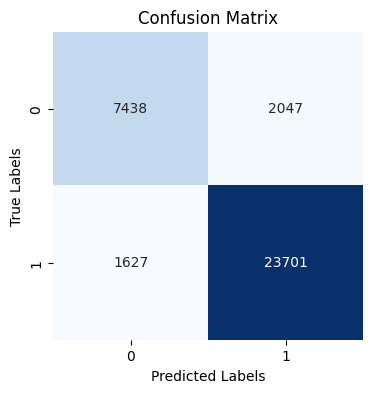

In [64]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
# classification reports
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      9485
           1       0.92      0.94      0.93     25328

    accuracy                           0.89     34813
   macro avg       0.87      0.86      0.87     34813
weighted avg       0.89      0.89      0.89     34813



# Creating a dataframe for all mortality 

In [66]:
# creating a dataframe for all mortality
df_allmort = pd.DataFrame(y_test)
df_allmort = df_allmort.reset_index()
df_allmort['y_pred_all_mortality'] = y_pred 
df_allmort['y_pred_all_mortality_proba'] = y_pred_xg_proba

In [67]:
 # renaming the "death" column as "y_true"
df_allmort.rename(columns = {'death':'y_true'}, inplace = True) 

In [68]:
df_allmort

,Internalpatientid,y_true,y_pred_all_mortality,y_pred_all_mortality_proba
0,6,1,1,0.999966
1,7,0,0,0.023813
2,9,1,1,0.999880
3,12,1,1,0.999979
4,17,1,1,1.000000
...,...,...,...,...
34808,64432,1,1,0.998570
34809,106205,1,1,0.973713
34810,138129,1,1,0.999841
34811,145401,1,1,0.997293


# Tier 1 -Statistics Metrics for All Cause Mortality (CV and Non-Cv)

In [69]:
from sklearn.metrics import (
average_precision_score,
roc_auc_score,
accuracy_score,
confusion_matrix,
precision_score,
f1_score,
)

# AUROC

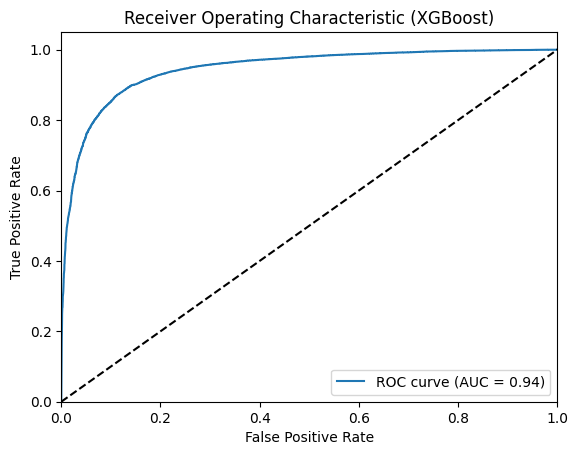

In [70]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Print AUC score( CV and Non-Cv)
print("AUC For Mortality Cv and Non-Cv:", roc_auc) 

AUC For Mortality Cv and Non-Cv: 0.9449430514350717


# Precision_recall_curve & auc

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xg_proba)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9773870946074462


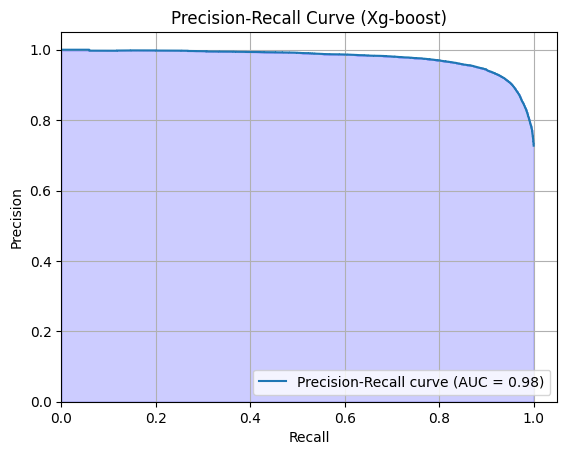

In [74]:
# Plot Precision-Recall curve
plt.figure()
sns.lineplot(x=recall, y=precision, drawstyle='steps-post', label='Precision-Recall curve (AUC = %0.2f)' % auc_precision_recall)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')  # Fill the area under the curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall Curve (Xg-boost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Overall accuracy

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.8944647114583633


# The sum of Sensitivity and Specificity

In [76]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [77]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9357627921667719


In [78]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7841855561412757


In [79]:
# Sum of Sensitivity and Specificity
sum_sensitivity_specificity = sensitivity + specificity
print("Sum of Sensitivity and Specificity:", sum_sensitivity_specificity)

Sum of Sensitivity and Specificity: 1.7199483483080478


# Tier-2 -Statistics Metrics for All Cause Mortality (CV and Non-Cv)

# Sensitivity (True Positive Rate, or TPR)

In [80]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9357627921667719


# Specificity (True Negative Rate, or TNR)

In [81]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7841855561412757


# Precision (Positive Predictive Value, PPV)

In [82]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.920498679509088


# Negative Predictive Value (NPV)

In [83]:
# Negative Predictive Value (NPV)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)

Negative Predictive Value (NPV): 0.8205184776613348


# Positive Likelihood Ratio (TPR/FPR)

In [84]:
# Positive Likelihood Ratio (PLR)
plr = sensitivity / (1 - specificity)
print("Positive Likelihood Ratio (PLR):", plr)

Positive Likelihood Ratio (PLR): 4.335959982267627


# Negative Likelihood Ratio (FNR/TNR)

In [85]:
# Negative Likelihood Ratio (NLR)
nlr = (1 - sensitivity) / specificity
print("Negative Likelihood Ratio (NLR):", nlr)

Negative Likelihood Ratio (NLR): 0.08191582633747892


# F1 score

In [86]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9280679771321168


# Importing the CV and Non-cv file 

# How we segregate the Cardiac and Non cardiac patients?

- To segregate Cardiac and Non-cardiac patients, we employed the 'Condition code icd10 subcategory' column from the 'condition' file. By conducting a word search caping using the disease names mentioned in the PrecisionFDA document and Then we classified patients into two distinct groups: **Cardiac(1) and Non-cardiac(0) patients.**

**Note: For a detailed explanation, kindly review the Python notebook titled "df_cv_non_cv_test_V1.ipynb" available under the specified location.**

In [87]:
df_cv_non_cv = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/df_cv_non_cv_test_V1.csv')

In [88]:
df_cv_non_cv

,Unnamed: 0,Internalpatientid,cv_df
0,0,6,0
1,1,7,0
2,2,9,1
3,3,12,1
4,4,17,0
...,...,...,...
34808,34808,169037,1
34809,34809,169045,0
34810,34810,169058,1
34811,34811,169059,0


In [89]:
# Taking the cv alone(1)
df_cv = df_cv_non_cv[df_cv_non_cv['cv_df']==1]

# Taking the necessary columns from dataframe
df_cv = df_cv[['Internalpatientid','cv_df']]
df_cv

,Internalpatientid,cv_df
2,9,1
3,12,1
5,22,1
6,25,1
10,53,1
...,...,...
34805,169011,1
34807,169024,1
34808,169037,1
34810,169058,1


# Merging the all mortality and cardiac patients

In [90]:
# Merging the all mortality and cardiac patients(Here u will get which patients have cardivasucular and which are the patients died due to the CV)
df_cvmort = pd.merge(df_allmort, df_cv, on ="Internalpatientid", how="inner")

In [91]:
# Renaming the columns
df_cvmort.rename(columns={'y_pred_all_mortality':'y_pred_cv_mortality','y_pred_all_mortality_proba':'y_pred_cv_mortality_proba'},inplace = True)

In [92]:
df_cvmort

,Internalpatientid,y_true,y_pred_cv_mortality,y_pred_cv_mortality_proba,cv_df
0,9,1,1,0.999880,1
1,12,1,1,0.999979,1
2,22,1,1,1.000000,1
3,25,0,0,0.000543,1
4,53,0,0,0.000005,1
...,...,...,...,...,...
11638,160195,1,1,0.992103,1
11639,167208,1,1,0.998442,1
11640,167963,1,1,0.999326,1
11641,168458,1,1,0.999797,1


In [93]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_cv= confusion_matrix(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality) 

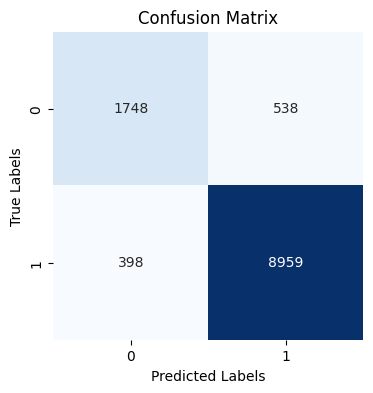

In [94]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [95]:
print(classification_report(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      2286
           1       0.94      0.96      0.95      9357

    accuracy                           0.92     11643
   macro avg       0.88      0.86      0.87     11643
weighted avg       0.92      0.92      0.92     11643



# Tier 1- Statistics for Metrics Mortality for Cardiovascular causes

# AUROC

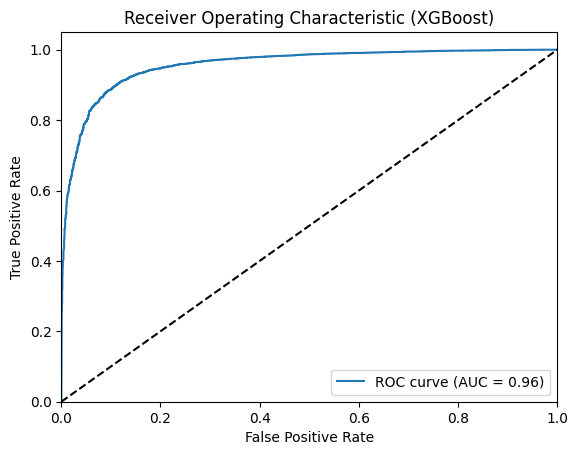

In [96]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

In [97]:
# Print AUC score*(Cv)
print("AUC For cardiovascular :", roc_auc)

AUC For cardiovascular : 0.9563453694610713


# Precision_recall_curve & auc

In [98]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality_proba)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9881855512184905


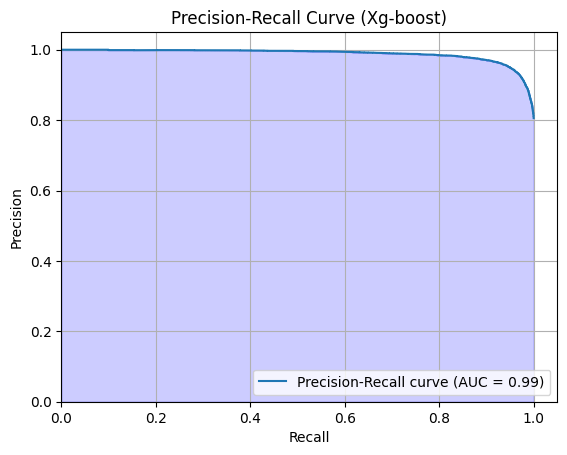

In [99]:
# Plot Precision-Recall curve
plt.figure()
sns.lineplot(x=recall, y=precision, drawstyle='steps-post', label='Precision-Recall curve (AUC = %0.2f)' % auc_precision_recall)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')  # Fill the area under the curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall Curve (Xg-boost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Overall accuracy

In [100]:
accuracy = accuracy_score(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9196083483638238


# The sum of Sensitivity and Specificity

In [101]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality).ravel()

In [102]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9574649994656407


In [103]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7646544181977253


In [104]:
# Sum of Sensitivity and Specificity
sum_sensitivity_specificity = sensitivity + specificity
print("Sum of Sensitivity and Specificity:", sum_sensitivity_specificity)

Sum of Sensitivity and Specificity: 1.7221194176633658


# Tier-2 - Statistics for Metrics Mortality for Cardiovascular causes

# Sensitivity (True Positive Rate, or TPR)

In [105]:
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9574649994656407


# Specificity (True Negative Rate, or TNR)

In [106]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7646544181977253


# Precision (Positive Predictive Value, PPV)

In [107]:
# Precision
precision = precision_score(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality)
print("Precision:", precision)

Precision: 0.9433505317468674


# Negative Predictive Value (NPV)

In [108]:
# Negative Predictive Value (NPV)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)

Negative Predictive Value (NPV): 0.8145386766076421


# Positive Likelihood Ratio (TPR/FPR)

In [109]:
# Positive Likelihood Ratio (PLR)
plr = sensitivity / (1 - specificity)
print("Positive Likelihood Ratio (PLR):", plr)

Positive Likelihood Ratio (PLR): 4.068336410368874


# Negative Likelihood Ratio (FNR/TNR)

In [110]:
# Negative Likelihood Ratio (NLR)
nlr = (1 - sensitivity) / specificity
print("Negative Likelihood Ratio (NLR):", nlr)

Negative Likelihood Ratio (NLR): 0.05562643662559806


# F1 score

In [111]:
# F1 Score
f1 = f1_score(df_cvmort.y_true, df_cvmort.y_pred_cv_mortality)
print("F1 Score:", f1)

F1 Score: 0.950355362257346


# Generating the figure -one csv as per FDA

In [112]:
# will get mortality for CV and mortality for non-cv
df_allmort_cvmort = pd.merge(df_allmort,df_cvmort,on="Internalpatientid",how="outer")

In [113]:
# Droping unwanted columns
df_allmort_cvmort.drop(['y_true_y','cv_df'],axis=1,inplace=True) 

In [114]:
# where ever NaN values are preseted that's means,Patients doesn't died due to the cardiovascular.if it's '1' that's mean, the patients died due to the cardiovascular
df_allmort_cvmort

,Internalpatientid,y_true_x,y_pred_all_mortality,y_pred_all_mortality_proba,y_pred_cv_mortality,y_pred_cv_mortality_proba
0,6,1,1,0.999966,NaN,NaN
1,7,0,0,0.023813,NaN,NaN
2,9,1,1,0.999880,1.0,0.999880
3,12,1,1,0.999979,1.0,0.999979
4,17,1,1,1.000000,NaN,NaN
...,...,...,...,...,...,...
34808,64432,1,1,0.998570,NaN,NaN
34809,106205,1,1,0.973713,NaN,NaN
34810,138129,1,1,0.999841,NaN,NaN
34811,145401,1,1,0.997293,NaN,NaN


In [115]:
# Filling the null with zero(because where ever NaN values are preseted that's maens,Patients doesn't died due to the CV)
df_allmort_cvmort['y_pred_cv_mortality'] =  df_allmort_cvmort['y_pred_cv_mortality'].fillna(0)
df_allmort_cvmort['y_pred_cv_mortality_proba'] = df_allmort_cvmort['y_pred_cv_mortality_proba'].fillna(0)

In [116]:
# Changing the data type as 'int'
df_allmort_cvmort['y_pred_cv_mortality'] =  df_allmort_cvmort['y_pred_cv_mortality'].astype('int')

In [162]:
df_allmort_cvmort

,Internalpatientid,y_true_x,y_pred_all_mortality,y_pred_all_mortality_proba,y_pred_cv_mortality,y_pred_cv_mortality_proba
0,6,1,1,0.999966,0,0.000000
1,7,0,0,0.023813,0,0.000000
2,9,1,1,0.999880,1,0.999880
3,12,1,1,0.999979,1,0.999979
4,17,1,1,1.000000,0,0.000000
...,...,...,...,...,...,...
34808,64432,1,1,0.998570,0,0.000000
34809,106205,1,1,0.973713,0,0.000000
34810,138129,1,1,0.999841,0,0.000000
34811,145401,1,1,0.997293,0,0.000000


In [163]:
# New varible
fig1_mort = df_allmort_cvmort

# Taking necessary columns from the dataframe 
fig1_mort = fig1_mort[['Internalpatientid','y_pred_all_mortality','y_pred_all_mortality_proba','y_pred_cv_mortality','y_pred_cv_mortality_proba']]

# Renaming the columns as per the FDA
fig1_mort.rename(columns={'y_pred_all_mortality':'All-cause mortality (cardio and Non-cardio)(Binary)','y_pred_all_mortality_proba':'All-cause mortality (cardio and Non-cardio)(Continuous)',
                          'y_pred_cv_mortality':'Mortality for cardiovascular causes(Binary)','y_pred_cv_mortality_proba':'Mortality for cardiovascular causes (Continuous)'},inplace = True)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [220]:
fig1_mort

,Internalpatientid,All-cause mortality (cardio and Non-cardio)(Binary),All-cause mortality (cardio and Non-cardio)(Continuous),Mortality for cardiovascular causes(Binary),Mortality for cardiovascular causes (Continuous)
0,6,1,0.999966,0,0.000000
1,7,0,0.023813,0,0.000000
2,9,1,0.999880,1,0.999880
3,12,1,0.999979,1,0.999979
4,17,1,1.000000,0,0.000000
...,...,...,...,...,...
34808,64432,1,0.998570,0,0.000000
34809,106205,1,0.973713,0,0.000000
34810,138129,1,0.999841,0,0.000000
34811,145401,1,0.997293,0,0.000000


In [221]:
# saving the file
fig1_mort.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_test/Potential_files_test/fig1_mort_V1.csv')

# Importing the quality check data

In [174]:
# List of file paths
file_paths = [ '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_conditions_quality.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_immunizations_quality.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_lab_results_qual_with_age_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_measurement_blood_pressure_qual_v1.csv',
               '/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_measurements_pivot_qual_v1.csv'
]


# Read the first file to create the merged DataFrame
merged_df_qual = pd.read_csv(file_paths[0])
merged_df_qual.drop(["Unnamed: 0"], axis=1, inplace =True)


# Iterate over the remaining files and merge them based on 'internalpatientid'
# The `file_paths[1:]` slice returns a new list that includes all elements from the original `file_paths` list starting from the second element (index 1) to the end of the list.
#This slicing operation is used to iterate over the file paths of all CSV files except the first one.
#the loop iterates over all the file paths starting from the second file (`death.csv`) to the last file (`visits.csv`), excluding the first file (`conditions.csv`).
for file_path in file_paths[1:]:
    df = pd.read_csv(file_path) # read the csv file into the dataframe
    if "Unnamed: 0" in df.columns:
        df.drop(["Unnamed: 0"], axis=1, inplace =True)
    #merged_df ios the first that actually we read'''
    merged_df_qual = merged_df_qual.merge(df, on='Internalpatientid', how='outer') # merge with existing merged_df dataframe and how='outer' which perform the outer join

In [175]:
# setting the index as Internalpatientid
merged_df_qual = merged_df_qual.set_index('Internalpatientid')

In [176]:
merged_df_qual

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature
Internalpatientid,,,,,,,,,
67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative,86.0,141.0,5.0,68.0,18.0,99.304386
200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H...",79.0,134.0,0.0,92.0,18.0,93.422097
291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0,69.0,129.0,0.0,75.0,18.0,98.475425
330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM...",58.0,117.0,2.0,67.0,16.0,95.141939
351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_...",77.0,167.0,0.0,73.0,19.0,95.922920
...,...,...,...,...,...,...,...,...,...
100314,NaN,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU...",51.0,102.0,0.0,119.0,19.0,94.094860
128935,NaN,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE,71.0,150.0,0.0,87.0,29.0,94.603855
132010,NaN,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative,69.0,104.0,7.0,115.0,18.0,101.190595


In [177]:
# checking the null value
merged_df_qual.isnull().sum()

Condition_code_icd10_subcategory    11
immunization                        61
Lab_test_description_Result         30
Diastolic bp                         7
Systolic bp                          7
Pain                                21
Pulse                               21
Respiratory rate                    21
Temperature                         21
dtype: int64

# Replacing the NaN with positive/negative

In [178]:
# Define the columns to replace NaN values
columns = ['Condition_code_icd10_subcategory', 'immunization', 'Lab_test_description_Result']

# Replace NaN values with "Positive" or "Negative"
merged_df_qual[columns] = merged_df_qual[columns].replace(np.nan, 'Positive/Negative')

# Replacing the NaN value with mean

In [179]:
# Taking the mean values for all columns numerical
mean_values_qual = merged_df_qual[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].mean()
mean_values_qual

Pain                  1.721144
Pulse                78.361593
Respiratory rate     18.625128
Temperature          97.511688
Diastolic bp         70.286347
Systolic bp         126.014053
dtype: float64

In [180]:
# Filling up the relevant columns' mean values for the null values
merged_df_qual[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']] = merged_df_qual[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']].fillna(mean_values_qual)

In [181]:
#Checking the missing values after fill up the null values
merged_df_qual.isnull().sum()

Condition_code_icd10_subcategory    0
immunization                        0
Lab_test_description_Result         0
Diastolic bp                        0
Systolic bp                         0
Pain                                0
Pulse                               0
Respiratory rate                    0
Temperature                         0
dtype: int64

In [182]:
# Split the dataframe into df1, df2
df_qual_emb = merged_df_qual[['Condition_code_icd10_subcategory','immunization','Lab_test_description_Result']]
df_qual_num = merged_df_qual[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]

In [183]:
df_qual_emb

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result
Internalpatientid,,,
67,58_Encounter for immunization,"58_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...",58_FIT_Negative
200,88_Vascular dementia,"87_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED","88_Mchc_33.94,88_Mch_31.07,88_RDW-CV_13.7,88_H..."
291,83_Secondary and unspecified malignant neoplas...,"82_FLU,3 YRS (HISTORICAL),82_INFLUENZA, UNSPEC...",83_FINGERSTICK GLUCOSE_75.0
330,75_Encounter for immunization,"75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_SODIUM_140.0,75_CHLORIDE_104.0,75_POTASSIUM..."
351,86_Other chronic osteomyelitis,82_TDAP,"86_MCHC_33.93,86_Mpv_7.11,86_RDW_18.65,86_Hgb_..."
...,...,...,...
100314,Positive/Negative,"74_INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED...","74_Hct_23.76,74_Mpv_10.0,74_IMMATURE GRANS, AU..."
128935,Positive/Negative,95_TDAP,95_MRSA SURVL NARES DNA_POSITIVE
132010,Positive/Negative,79_ZOSTER RECOMBINANT,79_MRSA SURVL NARES DNA_Negative


In [184]:
# Standardize the numerical columns
stand_df_qual = pd.DataFrame(scaler.transform(df_qual_num),  columns=df_qual_num.columns)

In [185]:
# Set the index of the standardized DataFrames back to the original values
stand_df_qual.index = df_qual_num.index

In [186]:
stand_df_qual

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,
67,1.139440,-0.568779,-0.201436,0.540793,1.396813,0.734905
200,-0.612898,0.896516,-0.201436,-1.439234,0.781490,0.392461
291,-0.612898,-0.141401,-0.201436,0.261758,-0.097543,0.147858
330,0.088037,-0.629833,-0.935445,-0.860321,-1.064479,-0.439189
351,-0.612898,-0.263509,0.165568,-0.597436,0.605684,2.006841
...,...,...,...,...,...,...
100314,-0.612898,2.544973,0.165568,-1.212776,-1.679802,-1.172998
128935,-0.612898,0.591246,3.835609,-1.041445,0.078264,1.175191
132010,1.840375,2.300757,-0.201436,1.175707,-0.097543,-1.075157


## Word Embedding for Textual Data for quality check data

In [187]:
# Encode the quality data using the model
qual_encoded_condition = model.encode(df_qual_emb['Condition_code_icd10_subcategory'].tolist())

In [188]:
# Encode the quality data using the model
qual_encoded_immunization = model.encode(df_qual_emb['immunization'].tolist())

In [189]:
# Encode the quality data using the model
qual_encoded_lab = model.encode(df_qual_emb['Lab_test_description_Result'].tolist())

# Converting the dataframe

In [190]:
condition_qual = pd.DataFrame(qual_encoded_condition)
immunization_qual  = pd.DataFrame(qual_encoded_immunization)
lab_qual = pd.DataFrame(qual_encoded_lab)

In [191]:
# Assuming df_qual_emb has an index named 'index_name'
condition_qual.index = df_qual_emb.index
immunization_qual.index = df_qual_emb.index
lab_qual.index = df_qual_emb.index

In [192]:
lab_qual

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.304529,-0.331937,-0.042798,0.146108,-0.084133,-0.014479,-0.019859,0.207271,0.147133,0.063688,...,0.132051,-0.047407,-0.080055,-0.050462,-0.000611,0.289246,0.108724,0.070458,0.085298,-0.047889
200,-0.127083,-0.006706,0.035578,0.006080,0.056092,-0.005060,-0.112083,0.245673,0.167988,0.143184,...,0.055158,0.075133,-0.170487,0.028871,-0.102132,-0.207156,-0.175669,-0.022140,-0.212934,-0.207614
291,-0.147461,-0.241918,-0.006744,0.081658,-0.018504,-0.100783,-0.222109,0.094379,0.296072,0.196803,...,-0.087086,0.094297,-0.099192,0.031944,-0.084188,-0.051735,0.014029,0.109430,-0.072321,-0.071033
330,-0.111017,-0.149571,-0.026839,0.040242,0.111864,-0.033153,-0.044685,0.176149,0.309657,0.173643,...,0.013710,0.055496,-0.136784,0.019758,-0.084875,-0.208506,-0.114067,0.137654,-0.216342,-0.152085
351,-0.096983,0.160320,0.141637,-0.067654,0.030087,-0.093408,-0.210184,0.140273,-0.052007,0.133127,...,-0.032093,-0.088704,-0.057448,-0.070285,-0.130485,-0.198507,-0.017558,0.138223,-0.070955,-0.123935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,-0.088526,-0.010720,0.108735,-0.021114,0.045310,-0.033258,-0.050621,0.179849,-0.002558,0.082239,...,-0.083108,0.030125,-0.109089,0.011215,-0.086236,-0.197659,-0.055231,0.050328,-0.055748,-0.064838
128935,-0.044247,-0.073589,0.031022,-0.200829,-0.047262,0.142809,-0.138038,0.109597,0.321229,0.042669,...,0.011401,0.121627,-0.020865,0.008180,0.000092,-0.265428,0.232264,-0.049255,-0.016997,-0.113827
132010,-0.047264,0.024413,0.042155,-0.200108,-0.088546,0.151596,-0.108913,0.137733,0.278547,0.025999,...,-0.036937,0.089744,-0.065667,-0.016701,0.006414,-0.166684,0.215738,-0.062469,0.003812,-0.044658


In [193]:
# concating the dataframe 
df_con_imm_lab_qual = pd.concat([condition_qual, immunization_qual, lab_qual],axis=1)

In [194]:
df_con_imm_lab_qual

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,0.051214,...,0.132051,-0.047407,-0.080055,-0.050462,-0.000611,0.289246,0.108724,0.070458,0.085298,-0.047889
200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,0.125943,...,0.055158,0.075133,-0.170487,0.028871,-0.102132,-0.207156,-0.175669,-0.022140,-0.212934,-0.207614
291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,0.081961,...,-0.087086,0.094297,-0.099192,0.031944,-0.084188,-0.051735,0.014029,0.109430,-0.072321,-0.071033
330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,0.027440,...,0.013710,0.055496,-0.136784,0.019758,-0.084875,-0.208506,-0.114067,0.137654,-0.216342,-0.152085
351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,0.147139,...,-0.032093,-0.088704,-0.057448,-0.070285,-0.130485,-0.198507,-0.017558,0.138223,-0.070955,-0.123935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.083108,0.030125,-0.109089,0.011215,-0.086236,-0.197659,-0.055231,0.050328,-0.055748,-0.064838
128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.011401,0.121627,-0.020865,0.008180,0.000092,-0.265428,0.232264,-0.049255,-0.016997,-0.113827
132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.036937,0.089744,-0.065667,-0.016701,0.006414,-0.166684,0.215738,-0.062469,0.003812,-0.044658


In [195]:
# Rename the columns
num_columns = condition_qual.shape[1]  # Number of columns in each set of encoded data
column_names = []
for i in range(num_columns):
    column_names.append(f"condition_{i+1}")

for i in range(num_columns):
    column_names.append(f"immunization_{i+1}")

for i in range(num_columns):
    column_names.append(f"lab_{i+1}")

# Assign the new column names to the DataFrame
df_con_imm_lab_qual.columns = column_names

In [196]:
# concating the quality data
df_new_qual = pd.concat([df_con_imm_lab_qual, stand_df_qual],axis=1)

In [197]:
#After renaming
df_new_qual

,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,...,lab_765,lab_766,lab_767,lab_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,0.051214,...,0.108724,0.070458,0.085298,-0.047889,1.139440,-0.568779,-0.201436,0.540793,1.396813,0.734905
200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,0.125943,...,-0.175669,-0.022140,-0.212934,-0.207614,-0.612898,0.896516,-0.201436,-1.439234,0.781490,0.392461
291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,0.081961,...,0.014029,0.109430,-0.072321,-0.071033,-0.612898,-0.141401,-0.201436,0.261758,-0.097543,0.147858
330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,0.027440,...,-0.114067,0.137654,-0.216342,-0.152085,0.088037,-0.629833,-0.935445,-0.860321,-1.064479,-0.439189
351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,0.147139,...,-0.017558,0.138223,-0.070955,-0.123935,-0.612898,-0.263509,0.165568,-0.597436,0.605684,2.006841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,-0.055231,0.050328,-0.055748,-0.064838,-0.612898,2.544973,0.165568,-1.212776,-1.679802,-1.172998
128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.232264,-0.049255,-0.016997,-0.113827,-0.612898,0.591246,3.835609,-1.041445,0.078264,1.175191
132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,0.029935,...,0.215738,-0.062469,0.003812,-0.044658,1.840375,2.300757,-0.201436,1.175707,-0.097543,-1.075157


In [198]:
x_qual = df_new_qual # x data (y is not given)

In [199]:
y_pred_qc = XG.predict(x_qual) # predicting the quality check data

In [200]:
y_pred_xg_proba_qc = XG.predict_proba(x_qual)[:,1] #  predict probability values

# Creating a dataframe for all mortality 

In [201]:
# creating a dataframe for all mortality
df_allmort_qc = pd.DataFrame(x_qual)
df_allmort_qc = df_allmort_qc.reset_index()
df_allmort_qc['y_pred_all_mortality'] = y_pred_qc
df_allmort_qc['y_pred_all_mortality_proba'] = y_pred_xg_proba_qc

In [202]:
df_allmort_qc 

,Internalpatientid,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,...,lab_767,lab_768,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp,y_pred_all_mortality,y_pred_all_mortality_proba
0,67,-0.065457,-0.214875,0.167266,-0.103739,0.148852,-0.002346,0.236427,-0.101004,0.303514,...,0.085298,-0.047889,1.139440,-0.568779,-0.201436,0.540793,1.396813,0.734905,0,0.000257
1,200,-0.116049,-0.029910,0.028984,-0.003204,0.049394,0.071531,0.016984,0.249156,0.195013,...,-0.212934,-0.207614,-0.612898,0.896516,-0.201436,-1.439234,0.781490,0.392461,0,0.373555
2,291,0.098055,0.148627,0.004865,0.030749,-0.033483,0.019669,-0.040439,0.083331,-0.157529,...,-0.072321,-0.071033,-0.612898,-0.141401,-0.201436,0.261758,-0.097543,0.147858,1,1.000000
3,330,-0.112037,-0.193050,0.139207,-0.088785,0.158870,0.025209,0.196612,-0.120163,0.296793,...,-0.216342,-0.152085,0.088037,-0.629833,-0.935445,-0.860321,-1.064479,-0.439189,0,0.000034
4,351,-0.072377,0.162673,0.003920,-0.022423,0.049834,0.025052,0.002451,0.213248,0.247767,...,-0.070955,-0.123935,-0.612898,-0.263509,0.165568,-0.597436,0.605684,2.006841,0,0.388491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100314,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.055748,-0.064838,-0.612898,2.544973,0.165568,-1.212776,-1.679802,-1.172998,0,0.320695
996,128935,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.016997,-0.113827,-0.612898,0.591246,3.835609,-1.041445,0.078264,1.175191,1,0.999937
997,132010,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,0.003812,-0.044658,1.840375,2.300757,-0.201436,1.175707,-0.097543,-1.075157,1,0.999663
998,149757,0.106968,-0.177053,0.036710,-0.168599,-0.145599,-0.069736,-0.057570,0.028802,-0.226040,...,-0.042538,-0.061920,1.489908,0.102815,-1.302449,-0.036986,1.484717,0.637064,1,0.827357


In [203]:
# Taking the necesaary columns
df_allmort_qc = df_allmort_qc[["Internalpatientid","y_pred_all_mortality","y_pred_all_mortality_proba"]]

In [204]:
df_allmort_qc

,Internalpatientid,y_pred_all_mortality,y_pred_all_mortality_proba
0,67,0,0.000257
1,200,0,0.373555
2,291,1,1.000000
3,330,0,0.000034
4,351,0,0.388491
...,...,...,...
995,100314,0,0.320695
996,128935,1,0.999937
997,132010,1,0.999663
998,149757,1,0.827357


# Importing the CV and Non-cv file 

In [205]:
df_cv_non_cv_qc = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/df_cv_non_cv_quality_V1.csv')

In [206]:
df_cv_non_cv_qc

,Unnamed: 0,Internalpatientid,cv_df
0,0,67,0
1,1,200,0
2,2,291,1
3,3,330,0
4,4,351,0
...,...,...,...
995,995,167907,0
996,996,167917,0
997,997,168008,0
998,998,168496,0


In [207]:
# Taking the cv alone(1)
df_cv_qc = df_cv_non_cv_qc[df_cv_non_cv_qc['cv_df']==1]

# Taking the necessary columns
df_cv_qc = df_cv_qc[['Internalpatientid','cv_df']]
df_cv_qc

,Internalpatientid,cv_df
2,291,1
5,444,1
6,714,1
9,1429,1
10,1451,1
...,...,...
973,164385,1
978,165284,1
981,165836,1
990,166856,1


# Merging the all mortality and cardiac patients

In [208]:
# merging the all mortality and cardiac patients(Here u will get which patients have cardivasucular and which are the patients died due to the CV)
df_cvmort_qc = pd.merge(df_allmort_qc, df_cv_qc, on ="Internalpatientid", how="inner")

In [209]:
# Renaming the columns
df_cvmort_qc.rename(columns={'y_pred_all_mortality':'y_pred_cv_mortality','y_pred_all_mortality_proba':'y_pred_cv_mortality_proba'},inplace = True)

In [210]:
df_cvmort_qc

,Internalpatientid,y_pred_cv_mortality,y_pred_cv_mortality_proba,cv_df
0,291,1,1.000000,1
1,444,1,0.999996,1
2,714,1,0.999613,1
3,1429,1,1.000000,1
4,1451,0,0.032620,1
...,...,...,...,...
313,166856,1,0.999811,1
314,168899,1,0.999653,1
315,88071,1,0.785024,1
316,100314,0,0.320695,1


# Generating the figure -one csv as per FDA

In [211]:
# will get mortality for CV and mortality for non-cv
df_allmort_cvmort_qc = pd.merge(df_allmort_qc, df_cvmort_qc, on="Internalpatientid", how="outer")

In [212]:
# Droping the unwanted column
df_allmort_cvmort_qc.drop(['cv_df'],axis=1,inplace=True)

In [213]:
# where ever "NaN" values are preseted that's means,Patients doesn't died due to the cardiovascular.
# if it's '1' that's mean, the patients died due to the cardiovascular.
df_allmort_cvmort_qc

,Internalpatientid,y_pred_all_mortality,y_pred_all_mortality_proba,y_pred_cv_mortality,y_pred_cv_mortality_proba
0,67,0,0.000257,NaN,NaN
1,200,0,0.373555,NaN,NaN
2,291,1,1.000000,1.0,1.000000
3,330,0,0.000034,NaN,NaN
4,351,0,0.388491,NaN,NaN
...,...,...,...,...,...
995,100314,0,0.320695,0.0,0.320695
996,128935,1,0.999937,NaN,NaN
997,132010,1,0.999663,NaN,NaN
998,149757,1,0.827357,NaN,NaN


In [214]:
# Filling the null with zero
df_allmort_cvmort_qc['y_pred_cv_mortality'] =  df_allmort_cvmort_qc['y_pred_cv_mortality'].fillna(0)
df_allmort_cvmort_qc['y_pred_cv_mortality_proba'] = df_allmort_cvmort_qc['y_pred_cv_mortality_proba'].fillna(0)

In [215]:
# Changing the data type as 'int'
df_allmort_cvmort_qc['y_pred_cv_mortality'] =  df_allmort_cvmort_qc['y_pred_cv_mortality'].astype('int')

In [216]:
df_allmort_cvmort_qc

,Internalpatientid,y_pred_all_mortality,y_pred_all_mortality_proba,y_pred_cv_mortality,y_pred_cv_mortality_proba
0,67,0,0.000257,0,0.000000
1,200,0,0.373555,0,0.000000
2,291,1,1.000000,1,1.000000
3,330,0,0.000034,0,0.000000
4,351,0,0.388491,0,0.000000
...,...,...,...,...,...
995,100314,0,0.320695,0,0.320695
996,128935,1,0.999937,0,0.000000
997,132010,1,0.999663,0,0.000000
998,149757,1,0.827357,0,0.000000


In [217]:
# New varible
fig1_mort_qc = df_allmort_cvmort_qc

# Renaming the columns as per the FDA
fig1_mort_qc.rename(columns={'y_pred_all_mortality':'All-cause mortality (cardio and Non-cardio)(Binary)','y_pred_all_mortality_proba':'All-cause mortality (cardio and Non-cardio)(Continuous)',
                             'y_pred_cv_mortality':'Mortality for cardiovascular causes(Binary)','y_pred_cv_mortality_proba':'Mortality for cardiovascular causes (Continuous)'},inplace = True)

In [222]:
fig1_mort_qc

,Internalpatientid,All-cause mortality (cardio and Non-cardio)(Binary),All-cause mortality (cardio and Non-cardio)(Continuous),Mortality for cardiovascular causes(Binary),Mortality for cardiovascular causes (Continuous)
0,67,0,0.000257,0,0.000000
1,200,0,0.373555,0,0.000000
2,291,1,1.000000,1,1.000000
3,330,0,0.000034,0,0.000000
4,351,0,0.388491,0,0.000000
...,...,...,...,...,...
995,100314,0,0.320695,0,0.320695
996,128935,1,0.999937,0,0.000000
997,132010,1,0.999663,0,0.000000
998,149757,1,0.827357,0,0.000000


In [223]:
# saving the file
fig1_mort_qc.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team-3-susai-gpu2/code/Users/900379/Output_files_quality/fig1_mort_qc_V1.csv')